In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Read and convert data

In [2]:
df_end = pd.read_csv('data/BPI_Challenge_2012_end.csv')

In [3]:
# only keep the starting and end point of a case 

df_split = df_end[(df_end['Activity'] == 'A_SUBMITTED-COMPLETE') | (df_end['Activity'] == 'End-End')]
df_split['Complete Timestamp'] = pd.to_datetime(df_split['Complete Timestamp'])

In [4]:
df_split

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,lifecycle:transition,concept:name,AMOUNT_REQ
0,173688,A_SUBMITTED-COMPLETE,112,2011-10-01 00:38:44.546,Variant 613,613,COMPLETE,A_SUBMITTED,20000
26,173688,End-End,End,2011-10-13 10:37:37.026,Variant 613,613,End,End,End
27,173691,A_SUBMITTED-COMPLETE,112,2011-10-01 08:08:58.256,Variant 614,614,COMPLETE,A_SUBMITTED,5000
66,173691,End-End,End,2011-10-10 14:17:34.633,Variant 614,614,End,End,End
67,173694,A_SUBMITTED-COMPLETE,112,2011-10-01 08:10:30.287,Variant 615,615,COMPLETE,A_SUBMITTED,7000
...,...,...,...,...,...,...,...,...,...
275261,214370,End-End,End,2012-03-01 09:28:21.228,Variant 2,2,End,End,End
275262,214373,A_SUBMITTED-COMPLETE,112,2012-02-29 23:43:09.766,Variant 4366,4366,COMPLETE,A_SUBMITTED,8500
275279,214373,End-End,End,2012-03-10 12:50:54.881,Variant 4366,4366,End,End,End
275280,214376,A_SUBMITTED-COMPLETE,112,2012-02-29 23:51:16.799,Variant 2,2,COMPLETE,A_SUBMITTED,15000


## Generate train-test split

In [7]:
# finds the optimal split for given range.
# it's only a small difference, but wanted to check so we can report the discarded data in case asked

def find_split(data, interval):
    
    loss = len(data)
    
    for i in interval:
        train, test = train_test_split(data['Case ID'].unique(), test_size=(100-i)/100, shuffle=False)
        train_data = data[data['Case ID'].isin(train)]
        test_data = data[data['Case ID'].isin(test)]
        
        overlap = train_data[train_data['Complete Timestamp'] > test_data['Complete Timestamp'].min()][['Case ID']]
        
        if len(overlap) < loss:
            loss = len(overlap)
            best_train = train_data[~train_data['Case ID'].isin(overlap['Case ID'].tolist())]
            best_test = test_data
    
    
    print('Train data lost due to overlap: ' + str(len(overlap)/len(train_data)))
    return best_train, best_test

In [9]:
df_train, df_test = find_split(df_split, range(65,75))

Train data lost due to overlap: 0.04357703428335399


## Visualize split

In [12]:
split_date = df_train['Complete Timestamp'].max()
split_case = df_train['Case ID'].max()

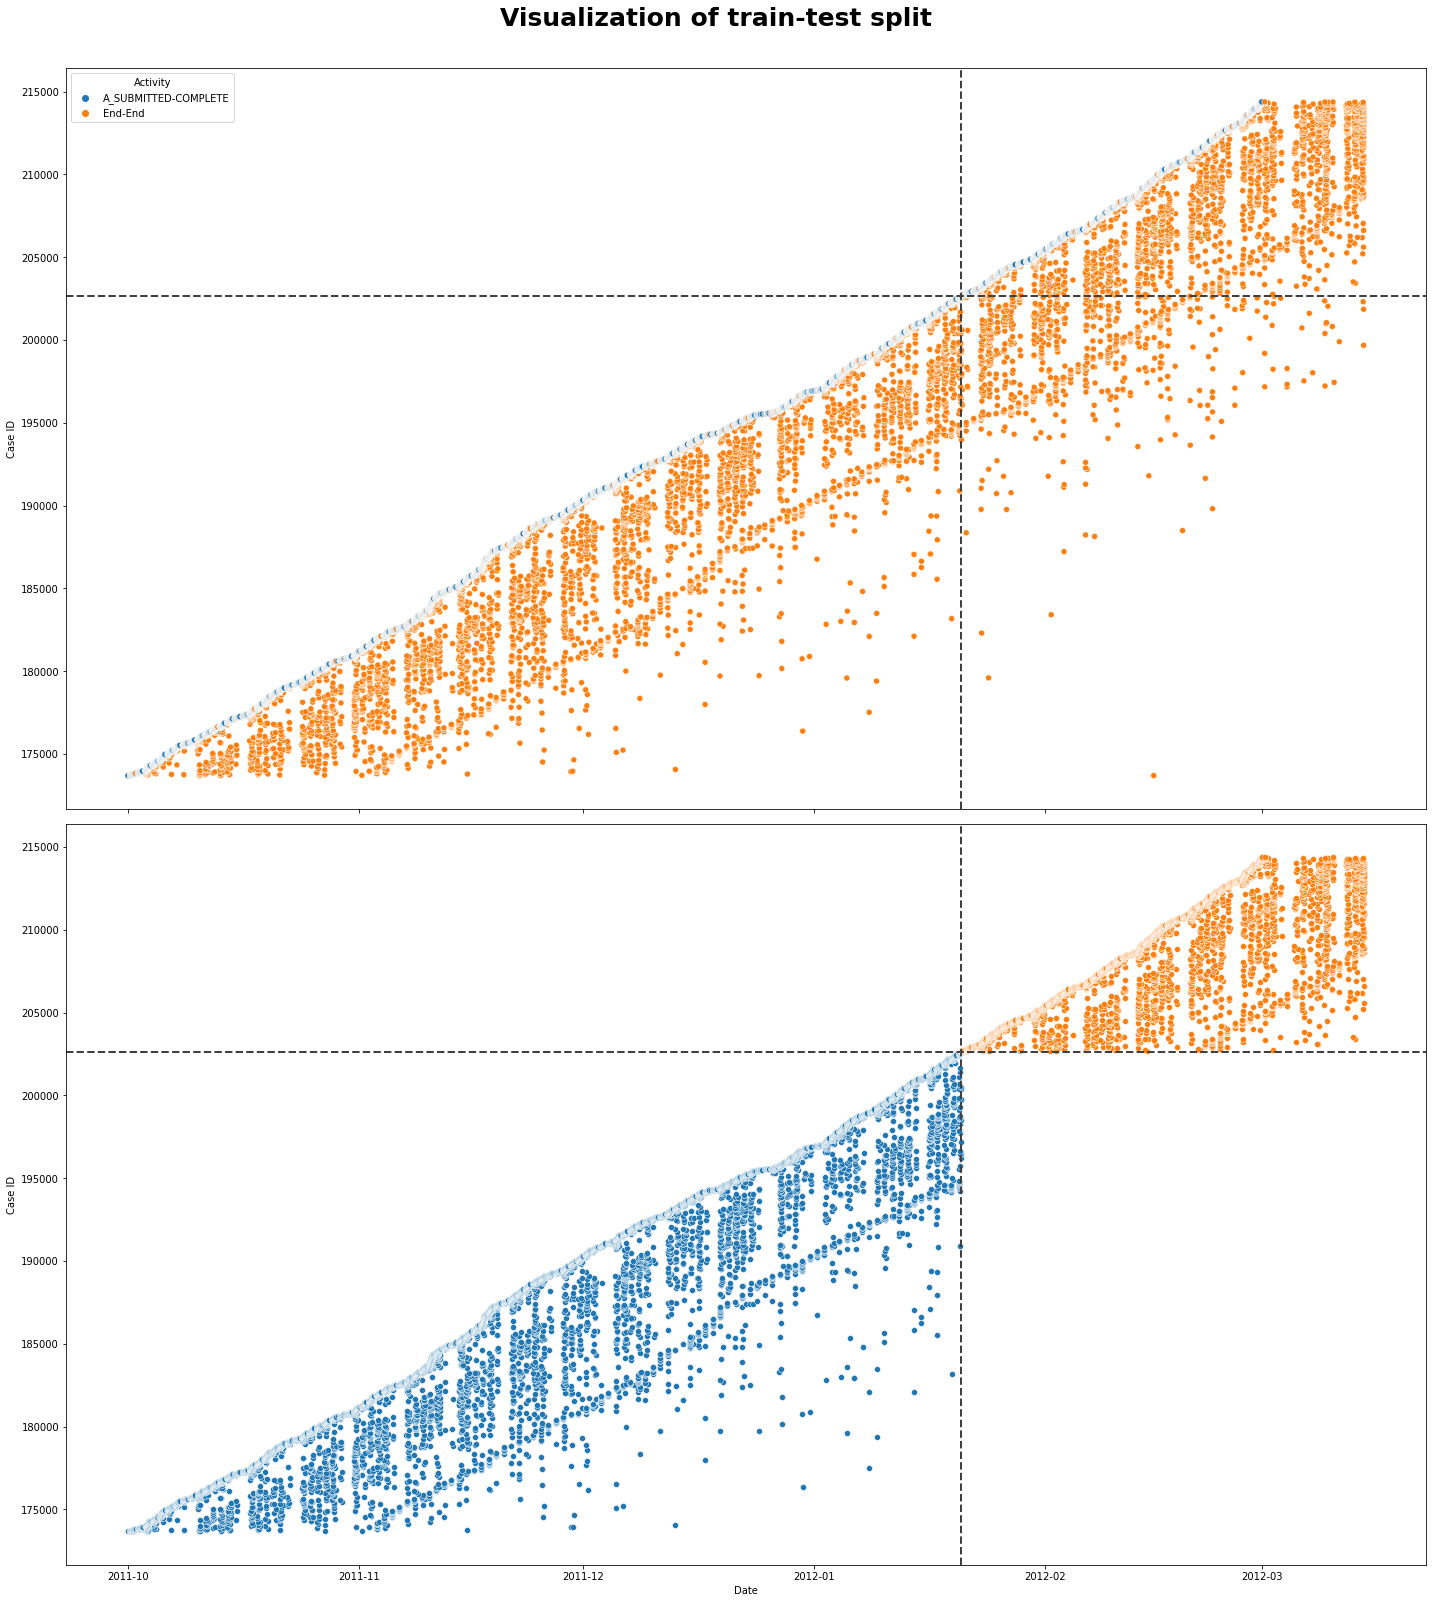

In [13]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 22))

sns.scatterplot(data=df_split, x='Complete Timestamp', y='Case ID', hue='Activity', ax=ax[0])
sns.scatterplot(data=df_train, x='Complete Timestamp', y='Case ID', ax=ax[1])
sns.scatterplot(data=df_test, x='Complete Timestamp', y='Case ID', ax=ax[1])

fig.suptitle('Visualization of train-test split', size=25, weight='bold', y=1.01)
fig.tight_layout()

ax[0].set_xlabel('')
ax[0].set_ylabel('Case ID')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Case ID')

ax[0].axvline(x=split_date, color = '#404040', linestyle='--', linewidth=2)
ax[0].axhline(y=split_case, color = '#404040', linestyle='--', linewidth=2)
ax[1].axvline(x=split_date, color = '#404040', linestyle='--', linewidth=2)
ax[1].axhline(y=split_case, color = '#404040', linestyle='--', linewidth=2)

plt.show()